# Getting started with Starling (ST)


In [1]:
%pip install https://github.com/camlab-bioml/starling/archive/main.zip
%pip install lightning_lite

import anndata as ad
import pandas as pd
import torch
from lightning_lite import seed_everything
from pytorch_lightning.callbacks import EarlyStopping  # ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

from starling import starling, utility

  Using cached https://github.com/camlab-bioml/starling/archive/main.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


c:\Users\miria\anaconda3\envs\dl4ls\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [106]:
%pip install lightning_lite
import numpy as np
import anndata as ad
import pandas as pd
import torch
from lightning_lite import seed_everything
from pytorch_lightning.callbacks import EarlyStopping  # ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

Note: you may need to restart the kernel to use updated packages.


In [2]:
torch.cuda.is_available()

False

## Setting seed for everything


In [3]:
# pl.utilities.seed.seed_everything(10, workers=True)
seed_everything(10, workers=True)

Global seed set to 10


10

## Loading annData objects


The example below runs Kmeans with 10 clusters read from "sample_input.h5ad" object.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#anndata = ad.read_h5ad("data\train\cell_data.h5ad") #/content/drive/MyDrive/cell_data.h5ad

anndata = ad.read_h5ad("C:/Users/miria/OneDrive/Documents/AMatematyka/aaaaDL4LS/DL4LS24-IDK-main/data/train/cell_data.h5ad")

In [5]:
anndata.var

,channel,use_channel,marker
0,Y89,1,MPO
1,In113,0,HistoneH3
2,In115,1,SMA
3,Pr141,1,CD16
4,Nd142,1,CD38
5,Nd143,1,HLADR
6,Nd144,1,CD27
7,Nd145,1,CD15
8,Nd146,1,CD45RA
9,Sm147,1,CD163


In [6]:
df=anndata.obs
df

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2713,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2713.0,596.548387,596.709677,31.0,6.857501,5.700162,0.555928,600.0,...,0,0,0,0,0,0,85.376518,,Batch20220908,Mural
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2715,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2715.0,180.300000,597.400000,20.0,6.484816,3.840203,0.805803,600.0,...,0,0,0,0,0,1,10.318477,,Batch20220908,Mural
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2721,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2721.0,48.370370,598.111111,27.0,10.732613,3.134663,0.956397,600.0,...,0,0,0,0,0,1,14.074760,,Batch20220908,CD8
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2722,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2722.0,207.969697,598.060606,33.0,12.864691,3.228974,0.967988,600.0,...,0,0,0,0,0,0,26.662288,,Batch20220908,Mural


In [7]:
print(anndata.shape)
print(anndata.obs_names)
print(anndata.var_names)
print(anndata.var_keys())
print(anndata.varm_keys())
print(anndata.obsm)
print(anndata.layers)
print(anndata.layers['exprs'].shape)
print(anndata.layers['counts'].shape)
print(anndata.layers.keys())
print(anndata.X)

anndata.X = anndata.layers['exprs'] # FIX!
print(anndata.X)

(236791, 40)
Index(['IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_12',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_21',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_23',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_28',
       'IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_30',
       ...
       'IMMUcan_Batch20220908_S-220729-00002_002.tiff_2707',
       'IMMUcan_Batch20220908_S-220729-00002_002.tiff_2708',
       'IMMUcan_Batch20220908_S-220729-00002_002.tiff_2709',
       'IMMUcan_Batch20220908_S-220729

In [8]:

adata = utility.init_clustering("KM", anndata, k=20)

- Users might want to arcsinh protein expressions in \*.h5ad (for example, 'sample_input.h5ad').
- The utility.py provides an easy setup of GMM, KM (Kmeans) or PG (PhenoGraph).
- Default settings are applied to each method.
- k can be omitted when PG is used.


In [9]:
adata

AnnData object with n_obs × n_vars = 236791 × 40
    obs: 'image', 'sample_id', 'ObjectNumber', 'Pos_X', 'Pos_Y', 'area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px', 'height_px', 'acquisition_id', 'SlideId', 'Study', 'Box.Description', 'Position', 'SampleId', 'Indication', 'BatchId', 'SubBatchId', 'ROI', 'ROIonSlide', 'includeImage', 'flag_no_cells', 'flag_no_ROI', 'flag_total_area', 'flag_percent_covered', 'small_cell', 'celltypes', 'flag_tumor', 'PD1_pos', 'Ki67_pos', 'cleavedPARP_pos', 'GrzB_pos', 'tumor_patches', 'distToCells', 'CD20_patches', 'Batch', 'cell_labels', 'init_label'
    var: 'channel', 'use_channel', 'marker'
    varm: 'init_exp_centroids', 'init_exp_variances'
    layers: 'counts', 'exprs'

## Setting initializations


The example below uses defualt parameter settings based on benchmarking results (more details in manuscript).


In [10]:
st = starling.ST(adata)

c:\Users\miria\anaconda3\envs\dl4ls\lib\site-packages\starling\starling.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  torch.tensor(self.adata.obs[self.cell_size_col_name])


A list of parameters are shown:

- adata: annDATA object of the sample
- dist_option (default: 'T'): T for Student-T (df=2) and N for Normal (Gaussian)
- the proportion of anticipated segmentation error free cells (default: 0.6)
- model_cell_size (default: 'Y'): Y for incoporating cell size in the model and N otherwise
- cell_size_col_name (default: 'area'): area is the column name in anndata.obs dataframe
- model_zplane_overlap (default: 'Y'): Y for modeling z-plane overlap when cell size is modelled and N otherwise
  Note: if the user sets model_cell_size = 'N', then model_zplane_overlap is ignored
- model_regularizer (default: 1): Regularizier term impose on synthetic doublet loss (BCE)
- learning_rate (default: 1e-3): The learning rate of ADAM optimizer for STARLING

Equivalent as the above example:
st = starling.ST(adata, 'T', 'Y', 'area', 'Y', 1, 1e-3)


## Setting trainning log


Once training starts, a new directory 'log' will created.


In [11]:
## log training results via tensorboard

log_tb = TensorBoardLogger(save_dir="log")

One could view the training information via tensorboard. Please refer to torch lightning (https://lightning.ai/docs/pytorch/stable/api_references.html#profiler) for other possible loggers.


## Setting early stopping criterion


In [12]:
## set early stopping criterion
cb_early_stopping = EarlyStopping(monitor="train_loss", mode="min", verbose=False)

Training loss is monitored.


## Training Starling


In [14]:
## train ST
st.train_and_fit(
    callbacks=[cb_early_stopping],
    logger=[log_tb],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name | Type | Params
------------------------------
------------------------------
0         Trainable params
0         Non-trainable params
0         Total params
0.000     Total estimated model params size (MB)


Epoch 1:  59%|█████▉    | 275/463 [05:10<03:32,  0.89it/s, v_num=1, train_loss_step=28.60, train_loss_epoch=31.30]

## Appending STARLING results to annData object


In [95]:
## retrive starling results
result = st.result()

## The following information can be retrived from annData object:

- st.adata.varm['init_exp_centroids'] -- initial expression cluster centroids (P x C matrix)
- st.adata.varm['st_exp_centroids'] -- ST expression cluster centroids (P x C matrix)
- st.adata.uns['init_cell_size_centroids'] -- initial cell size centroids if STARLING models cell size
- st.adata.uns['st_cell_size_centroids'] -- initial & ST cell size centroids if ST models cell size
- st.adata.obsm['assignment_prob_matrix'] -- cell assignment probability (N x C maxtrix)
- st.adata.obsm['gamma_prob_matrix'] -- gamma probabilitiy of two cells (N x C x C maxtrix)
- st.adata.obs['doublet'] -- doublet indicator
- st.adata.obs['doublet_prob'] -- doublet probabilities
- st.adata.obs['init_label'] -- initial assignments
- st.adata.obs['st_label'] -- ST assignments
- st.adata.obs['max_assign_prob'] -- ST max probabilites of assignments
  - N: # of cells; C: # of clusters; P: # of proteins


## Saving the model


In [16]:
## st object can be saved
torch.save(st, "model.pt")

model.pt will be saved in the same directory as this notebook.


## Showing STARLING results


In [96]:
display(result)

AnnData object with n_obs × n_vars = 236791 × 40
    obs: 'image', 'sample_id', 'ObjectNumber', 'Pos_X', 'Pos_Y', 'area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px', 'height_px', 'acquisition_id', 'SlideId', 'Study', 'Box.Description', 'Position', 'SampleId', 'Indication', 'BatchId', 'SubBatchId', 'ROI', 'ROIonSlide', 'includeImage', 'flag_no_cells', 'flag_no_ROI', 'flag_total_area', 'flag_percent_covered', 'small_cell', 'celltypes', 'flag_tumor', 'PD1_pos', 'Ki67_pos', 'cleavedPARP_pos', 'GrzB_pos', 'tumor_patches', 'distToCells', 'CD20_patches', 'Batch', 'cell_labels', 'init_label', 'st_label', 'doublet_prob', 'doublet', 'max_assign_prob'
    var: 'channel', 'use_channel', 'marker'
    uns: 'init_cell_size_centroids', 'init_cell_size_variances', 'st_cell_size_centroids'
    obsm: 'assignment_prob_matrix', 'gamma_assignment_prob_matrix'
    varm: 'init_exp_centroids', 'init_exp_variances', 'st_exp_centroids'
    layers: 'counts', 'exprs'

One could easily perform further analysis such as co-occurance, enrichment analysis and etc.


## NEW PART STARTS HERE

In [97]:
### We analyze, concatenate result obtained from starling
exprs_result=result.layers['exprs']
new_df_obs=result.obs

list_cols_exprs=['exprs'+str(i) for i in range(40)]
df_exprs = pd.DataFrame(data=exprs_result, columns=list_cols_exprs,index=new_df_obs.index)
result_concat = pd.concat([new_df_obs, df_exprs], axis=1)


118938
61794


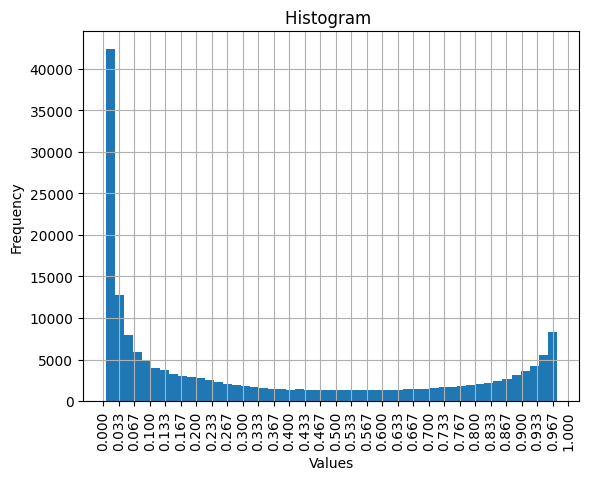

In [102]:
### As we can see below there are many candidates for doublets = errors in segmentation
print(len(result_concat[result_concat['doublet']==1]))
### According to authors we should get rid of 118938 values, we decided to increase the threshold value
print(len(result_concat[result_concat['doublet_prob']>0.975]))

pruned_df=result_concat[result_concat['doublet_prob']<0.975]
import numpy as np
import matplotlib.pyplot as plt

plt.hist(pruned_df['doublet_prob'], bins=50)  # Adjust the number of bins as needed
plt.xlabel('Values')  
plt.ylabel('Frequency')  
plt.title('Histogram ')  
plt.grid(True)  
custom_ticks = np.linspace(0, 1, 31) 
plt.xticks(custom_ticks,rotation='vertical')
plt.show()

In [47]:
st_label_list = pruned_df['init_label'].unique().tolist()
init_label_list = pruned_df['st_label'].unique().tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [104]:
path="C:/Users/miria/OneDrive/Documents/AMatematyka/aaaaDL4LS/DL4LS24-IDK-main/data/train/cell_data.h5ad"
### input Your path
final_num_epochs=50
final_lr=0.003
final_hidden_size=100
final_batch_size=32
anndata = ad.read_h5ad(path)

anndata.X = anndata.layers['exprs'] # FIX!
df=anndata.obs
counts=anndata.layers['counts']
exprs=anndata.layers['exprs']

list_cols_exprs=['exprs'+str(i) for i in range(40)]
df_exprs = pd.DataFrame(data=exprs, columns=list_cols_exprs,index=df.index)
result = pd.concat([df, df_exprs], axis=1)
df=result.copy()
int_columns = df.select_dtypes(include='int').columns.tolist()
df[int_columns] = df[int_columns].astype(float)
non_float_columns = df.select_dtypes(exclude='float').columns.tolist()
category_columns = df.select_dtypes(include='category').columns.tolist()
ids=df['sample_id']
Y=df['cell_labels']
columns_to_remove=['SampleId','image','sample_id','SlideId','BatchId','SubBatchId','Batch','Box.Description','cell_labels','celltypes']
df = df.drop(columns=columns_to_remove)
df['CD20_patches'] = df['CD20_patches'].replace('', '0')
df['CD20_patches'] = df['CD20_patches'].astype(float)
one_hot_encoded1 = pd.get_dummies(df['Indication'], prefix='Indication')
one_hot_encoded1
one_hot_encoded1= one_hot_encoded1.astype(float)
df = df.join(one_hot_encoded1)
one_hot_encoded2 = pd.get_dummies(df['Study'], prefix='Study')
one_hot_encoded2= one_hot_encoded2.astype(float)
df = df.join(one_hot_encoded2)
df = df.drop(columns=['Indication','Study'])

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)
num_classes = len(np.unique(y_encoded))

X=df.copy()

C:\Users\miria\AppData\Local\Temp\ipykernel_16108\4185301769.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['CD20_patches'] = df['CD20_patches'].replace('', '0')


In [105]:
X_all=X.to_numpy()
nan_indices = np.isnan(X_all)
num_nans = np.sum(nan_indices)
column_means = np.nanmean(X_all, axis=0)
# We replace NaN values with column means
X_all[nan_indices] = np.take(column_means, np.where(nan_indices)[1])
nan_indices = np.isnan(X_all)
num_nans = np.sum(nan_indices)

class LinearClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x

Y_all=y_encoded
X_tensor_all = torch.tensor(X_all, dtype=torch.float32)
Y_tensor_all = torch.tensor(Y_all, dtype=torch.long)  
dataset = TensorDataset(X_tensor_all, Y_tensor_all)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
model = LinearClassifier(input_size=X_tensor_all.shape[1], hidden_size=100, num_classes=14)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.003)

def train(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == targets).sum().item()
            total_samples += targets.size(0)
        
        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_accuracy = correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

train(model, dataloader, criterion, optimizer, num_epochs=final_num_epochs)

Epoch 1/5, Loss: 0.7474, Accuracy: 0.7824
Epoch 2/5, Loss: 0.4525, Accuracy: 0.8606
Epoch 3/5, Loss: 0.4133, Accuracy: 0.8727
Epoch 4/5, Loss: 0.3772, Accuracy: 0.8842
Epoch 5/5, Loss: 0.3620, Accuracy: 0.8899


In [107]:
df_copy = copy.deepcopy(pruned_df)
int_columns = pruned_df.select_dtypes(include='int').columns.tolist()
pruned_df[int_columns] = pruned_df[int_columns].astype(float)
non_float_columns = pruned_df.select_dtypes(exclude='float').columns.tolist()
category_columns = pruned_df.select_dtypes(include='category').columns.tolist()
ids=pruned_df['sample_id']
Y=pruned_df['cell_labels']
columns_to_remove=['SampleId','image','sample_id','SlideId','BatchId','SubBatchId','Batch','Box.Description','cell_labels','celltypes']
pruned_df = pruned_df.drop(columns=columns_to_remove)
pruned_df['CD20_patches'] = pruned_df['CD20_patches'].replace('', '0')
pruned_df['CD20_patches'] = pruned_df['CD20_patches'].astype(float)
category_columns = pruned_df.select_dtypes(include='category').columns.tolist()
one_hot_encoded1 = pd.get_dummies(pruned_df['Indication'], prefix='Indication')
one_hot_encoded1= one_hot_encoded1.astype(float)
pruned_df = pruned_df.join(one_hot_encoded1)
one_hot_encoded2 = pd.get_dummies(pruned_df['Study'], prefix='Study')
one_hot_encoded2= one_hot_encoded2.astype(float)
pruned_df = pruned_df.join(one_hot_encoded2)
pruned_df = pruned_df.drop(columns=['Indication','Study'])
non_float_columns = pruned_df.select_dtypes(exclude='float').columns.tolist()


C:\Users\miria\AppData\Local\Temp\ipykernel_16108\3770430976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_df[int_columns] = pruned_df[int_columns].astype(float)
C:\Users\miria\AppData\Local\Temp\ipykernel_16108\3770430976.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pruned_df['CD20_patches'] = pruned_df['CD20_patches'].replace('', '0')


In [108]:
cols_to_drop=['init_label','doublet_prob','doublet', 'max_assign_prob']
pruned_df = pruned_df.drop(columns=cols_to_drop)
means_df = pruned_df.groupby('st_label').mean().reset_index()
st_label_column=means_df['st_label']
means_df = means_df.drop(columns='st_label')
means_np=means_df.to_numpy()
means_tensor = torch.tensor(means_np, dtype=torch.float32)

In [109]:
with torch.no_grad():
    outputs=model(means_tensor)
    print(outputs.shape)
    predictions_probabilities=torch.softmax(outputs,axis=1)
    predictions_probabilities=predictions_probabilities.detach().numpy() 
    predictions=np.argmax(predictions_probabilities, axis=1)

torch.Size([20, 14])


In [110]:
st_labels=st_label_column.to_numpy()
predictions,st_labels
matching_dict= {st_labels[i]: predictions[i] for i in range(len(predictions))}
pruned_df['labels'] = pruned_df['st_label'].map(matching_dict)
pruned_df['labels'] = encoder.inverse_transform(pruned_df['labels'])
final_df = pruned_df.join(Y)
final_df.columns
accuracy = accuracy_score(final_df['labels'], final_df['cell_labels'])
print("Accuracy:", accuracy)


Accuracy: 0.791047846534512


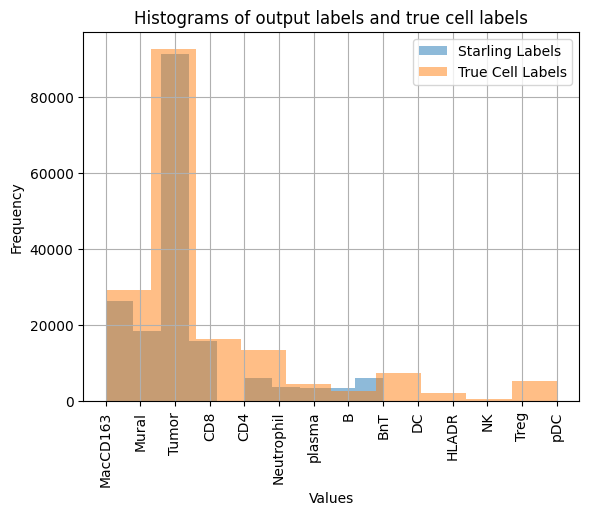

In [115]:

plt.hist(final_df['labels'], bins=10, alpha=0.5, label='Starling Labels')
plt.hist(final_df['cell_labels'], bins=10, alpha=0.5, label='True Cell Labels')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of output labels and true cell labels')
plt.legend()
plt.xticks(rotation='vertical') 
plt.grid(True)
plt.show()

## END OF THE NEW PART

Starling provides doublet probabilities and cell assignment if it were a singlet for each cell.


## Showing initial expression centriods:


In [21]:
## initial expression centriods (p x c) matrix
pd.DataFrame(result.varm["init_exp_centroids"], index=result.var_names)

,0,1,2,3,4,5,6,7,8,9
0,1.080168,0.224562,0.164699,0.370614,0.183527,0.275771,0.177567,0.303066,0.210930,0.184887
1,3.229904,2.302848,2.137359,3.703969,2.534624,2.782784,2.601243,3.683153,3.163677,2.086989
2,0.510982,0.555861,0.631802,0.758607,0.410126,0.565296,0.223304,0.437423,0.475693,0.251153
3,0.776690,1.386213,0.276250,2.129297,0.657512,2.125909,0.344827,1.158126,0.559709,0.436598
4,0.502440,0.366888,0.290245,1.748834,0.500118,0.662251,0.336827,0.849414,0.579554,0.156700
5,1.938710,3.148639,0.853243,3.917269,2.857464,3.812033,0.854614,2.424955,1.801325,1.557590
6,0.904367,0.651770,0.468081,2.258812,1.337823,1.068438,0.534309,1.206417,0.835693,0.398359
7,4.598357,0.673540,1.008130,1.600529,0.680451,1.115557,1.167692,1.204484,0.798630,1.529849
8,0.719088,0.512839,0.438064,1.820741,1.406929,0.807206,0.621261,1.192120,0.813073,0.300743
9,0.653638,1.493132,0.188555,1.647411,0.572977,2.269165,0.193129,0.534866,0.263102,0.266338


There are 10 centroids since we set Kmeans (KM) as k = 10 earlier.


## Showing Starling expression centriods:


In [22]:
## starling expression centriods (p x c) matrix
pd.DataFrame(result.varm["st_exp_centroids"], index=result.var_names)

,0,1,2,3,4,5,6,7,8,9
0,0.327218,0.184001,0.142257,0.321606,0.156965,0.194800,0.141279,0.338294,0.173369,0.148813
1,3.187449,2.223355,2.167264,3.812457,2.457853,2.579240,2.088436,4.016407,3.031217,1.997380
2,0.618755,0.264449,0.803525,0.427405,0.163500,0.332846,0.054653,0.184364,0.175077,0.087693
3,0.423130,1.410985,0.164072,2.309995,0.391286,2.058865,0.226855,1.139083,0.366854,0.201642
4,0.552561,0.212772,0.139694,1.582486,0.330254,0.481161,0.219444,0.971756,0.396167,0.103697
5,1.417797,3.239023,0.500020,4.034845,2.944723,3.823326,0.483763,1.997444,1.120504,1.108288
6,1.015991,0.512622,0.348483,2.274041,1.370421,0.919056,0.372110,1.349450,0.670276,0.245638
7,2.088245,0.391951,0.302867,0.844819,0.337810,0.777099,1.226742,0.776261,0.385528,1.690721
8,0.734870,0.317185,0.262223,1.607154,0.936441,0.636357,0.400998,1.321618,0.675541,0.192783
9,0.335721,1.420391,0.114128,1.557970,0.269009,2.125958,0.118928,0.391333,0.184710,0.097344


From here one could easily annotate cluster centriods to cell type.


## Showing Assignment Distributions:


In [23]:
## assignment distributions (n x c maxtrix)
pd.DataFrame(result.obsm["assignment_prob_matrix"], index=result.obs.index)

,0,1,2,3,4,5,6,7,8,9
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,1.146771e-09,9.724199e-01,4.981897e-13,1.066637e-27,3.608788e-10,4.291729e-08,1.508988e-18,5.701214e-26,9.856765e-17,3.630625e-19
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,2.731121e-01,5.959312e-08,1.737836e-07,9.420185e-24,1.753928e-07,2.378348e-12,7.400470e-11,7.542019e-15,2.765631e-05,1.107569e-17
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,1.280403e-11,3.499695e-05,2.322383e-23,3.663809e-11,6.512605e-10,5.945858e-01,2.610525e-26,1.795552e-13,1.781247e-17,2.690051e-30
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,1.518098e-07,1.614591e-08,9.546191e-26,1.828691e-12,1.026351e-06,5.541173e-03,4.919950e-23,5.164872e-09,7.183285e-12,1.742350e-32
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,1.941554e-02,9.858335e-05,6.684927e-12,4.562227e-18,6.580912e-07,7.997373e-07,7.173689e-12,1.073740e-11,3.507322e-04,2.603920e-18
...,...,...,...,...,...,...,...,...,...,...
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2713,5.795463e-01,4.171619e-03,8.309420e-08,2.883429e-20,1.181006e-05,4.540752e-09,8.058205e-14,4.672473e-16,6.207516e-14,4.588917e-15
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2715,2.781810e-17,1.321388e-14,9.821034e-01,6.978638e-44,1.121706e-18,3.986588e-29,4.141016e-17,1.211794e-39,2.678465e-24,5.263599e-11
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2721,4.110998e-06,3.981076e-04,4.954262e-20,1.286037e-14,1.735452e-03,6.310204e-02,8.068494e-23,2.846290e-19,2.356932e-18,1.289374e-29
IMMUcan_Batch20220908_S-220729-00002_002.tiff_2722,2.069664e-13,8.945088e-14,9.845455e-01,2.214576e-39,1.358008e-15,7.274008e-25,8.844567e-14,3.706804e-34,7.816540e-19,1.034745e-08


Currently, we assign a cell label based on the maximum probability among all possible clusters. However, there could be mislabeled because maximum and second highest probabilies can be very close that the user might be interested.


In [40]:
result.obsm['gamma_assignment_prob_matrix'].shape

(236791, 10, 10)